In [73]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-whitegrid')
def drawDict(dictData,name,outputPath):
    value = sorted(dictData.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    n=len(dictData);
    for each in value:
        x.append(each[0])
        y.append(each[1])
    plt.barh(x[0:n], y[0:n],label="RM detected RO")
    plt.xlabel("Number of RO")
    plt.ylabel("Type of RO")
    plt.title(name)
    
    outputPath=outputPath+name+".png"
    plt.savefig(outputPath,dpi=400,bbox_inches='tight')
    plt.show()

In [74]:
def getRefacTypeStatistic(filePath):
    with open(filePath,"r") as f:
        lines = f.readlines()
    for each in lines:
        if each.startswith("Number of RO generated because of squash is"):
            strDict = each.split("they are")[1]
            generated= eval(strDict)

        if each.startswith("Number of RO disappear because of squash is"):
            strDict = each.split("they are")[1]
            disappear = eval(strDict)
    return generated,disappear

In [75]:
def getRepoList(repoName):
    nameList=[]
    for i  in range(2,5):
        nameList.append((repoName+str(i)))
    return nameList

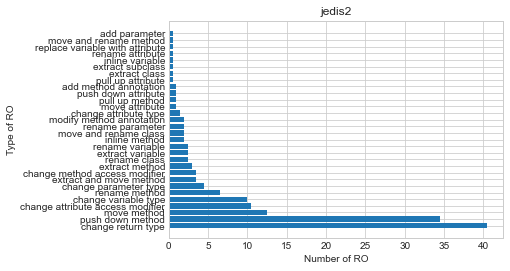

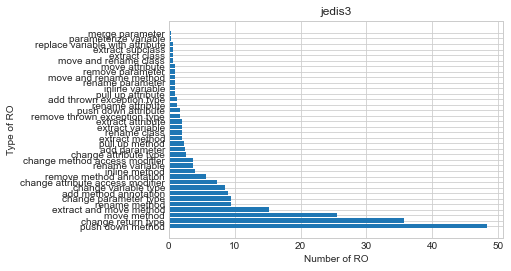

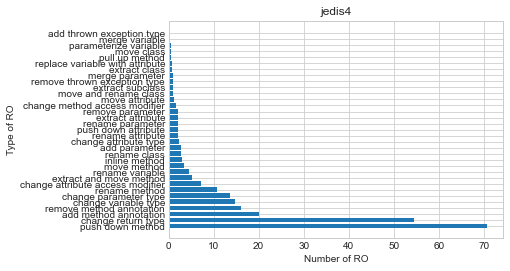

In [78]:
repoPath="/Users/leichen/ResearchAssistant/InteractiveRebase/data/experimentResult"
repoName="jedis"
compareResult="compareResult.txt"
outputPath="/Users/leichen/ResearchAssistant/InteractiveRebase/data/DGrefTypeGraph/"
for each in getRepoList(repoName):
    filePath=repoPath+"/"+each+"/"+compareResult
    gRT,dRT = getRefacTypeStatistic(filePath)
    drawDict(dRT,each,outputPath)

